# Subspace Digital Twin, Standard Stochastic Run

*Danilo Lessa Bernardineli, November 2023*

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns

pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [2]:
from subspace_model.experiment import standard_stochastic_run
sim_df = standard_stochastic_run()


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 701, 40, 30, 33)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (701, 40, 30, 33)


Initializing configurations:   0%|          | 0/30 [00:00<?, ?it/s]

Execution Method: local_simulations
Execution Mode: parallelized


Flattening results:   0%|          | 0/30 [00:00<?, ?it/s]

Total execution time: 89.86s


In [10]:
sim_df = sim_df.set_index(['run', 'subset', 'days_passed'])

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

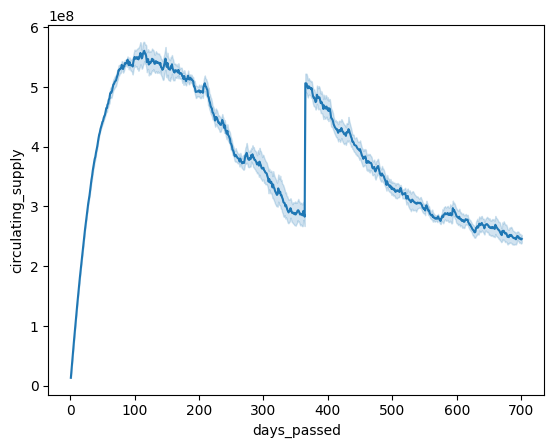

In [11]:
sns.lineplot(sim_df, x='days_passed', y='circulating_supply')

<Axes: xlabel='days_passed', ylabel='issued_supply'>

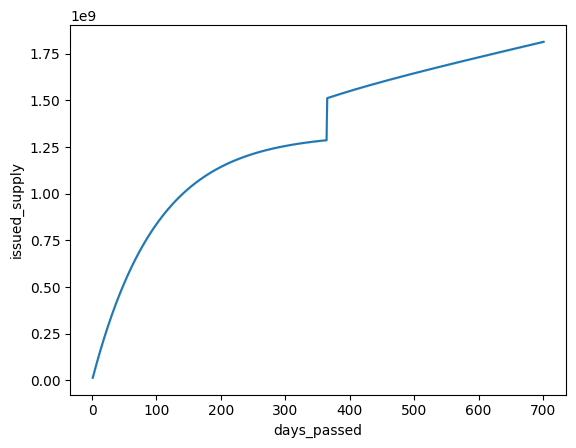

In [12]:
sns.lineplot(sim_df, x='days_passed', y='issued_supply')

<Axes: xlabel='days_passed', ylabel='operator_pool_shares'>

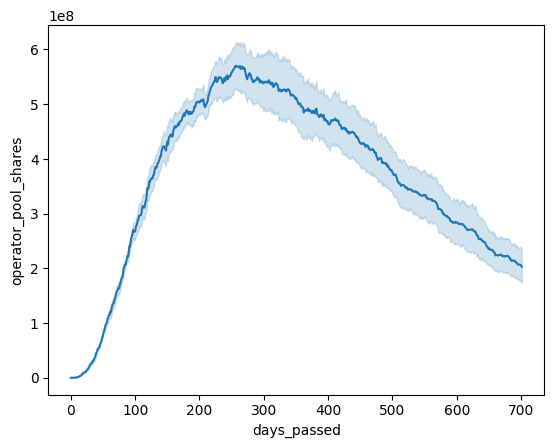

In [15]:
sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares')

<Axes: xlabel='days_passed', ylabel='nominator_pool_shares'>

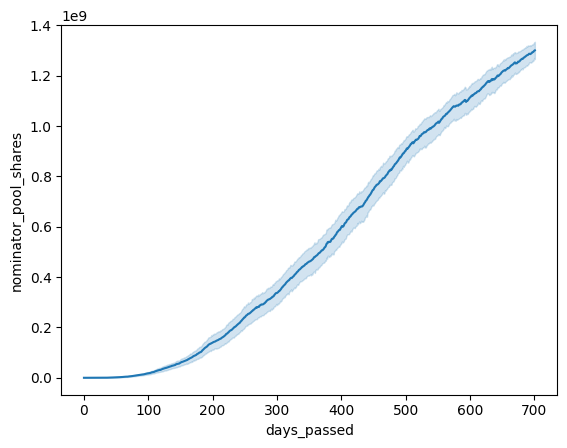

In [21]:
sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares')

[None]

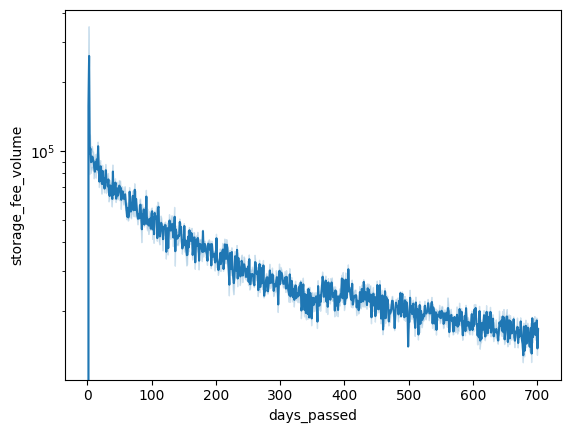

In [22]:
g_results = sns.lineplot(sim_df, x='days_passed', y='storage_fee_volume')
g_results.set(yscale='log')

[None]

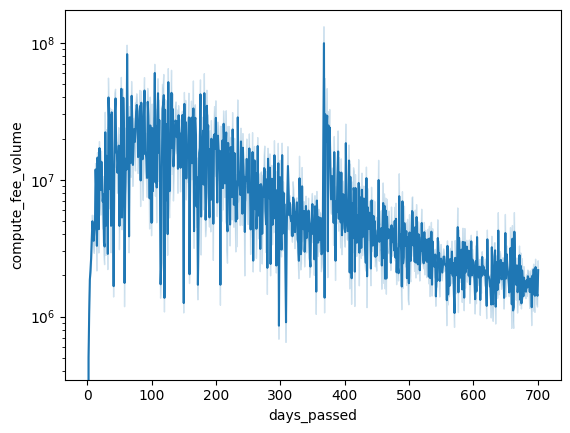

In [23]:
g_results = sns.lineplot(sim_df, x='days_passed', y='compute_fee_volume')
g_results.set(yscale='log')

<Axes: xlabel='days_passed', ylabel='average_base_fee'>

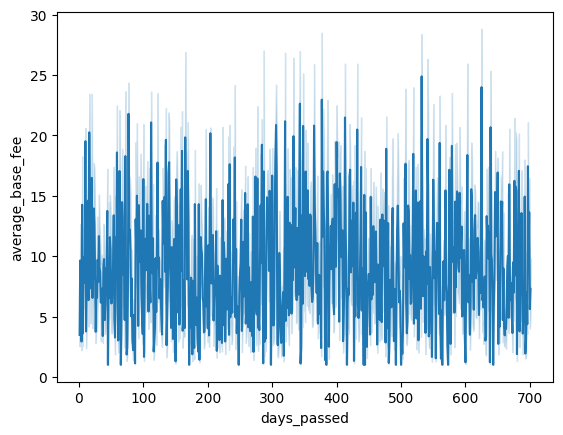

In [25]:
sns.lineplot(sim_df, x='days_passed', y='average_base_fee')

<Axes: xlabel='days_passed', ylabel='average_compute_weight_per_tx'>

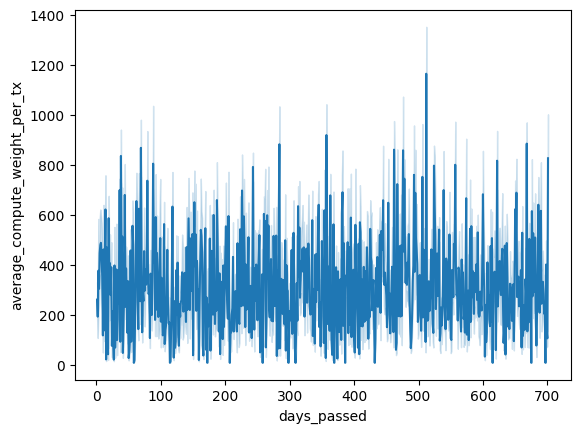

In [27]:
sns.lineplot(sim_df, x='days_passed', y='average_compute_weight_per_tx')

<Axes: xlabel='days_passed', ylabel='history_size'>

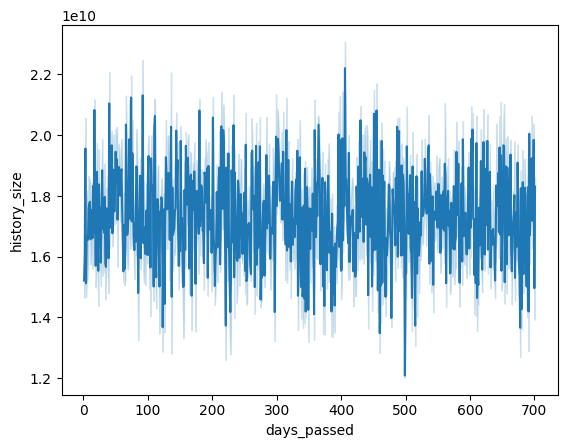

In [40]:
sns.lineplot(sim_df.history_size.diff().to_frame().query('days_passed > 0'), x='days_passed', y='history_size')

<Axes: xlabel='days_passed', ylabel='space_pledged'>

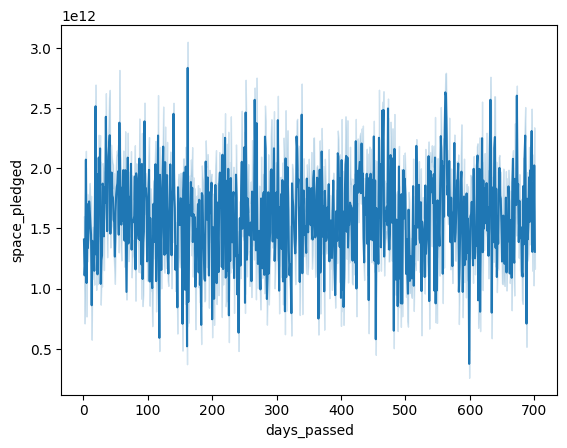

In [43]:
sns.lineplot(sim_df.space_pledged.diff().to_frame().query('days_passed > 0'), x='days_passed', y='space_pledged')

<Axes: xlabel='days_passed', ylabel='block_utilization'>

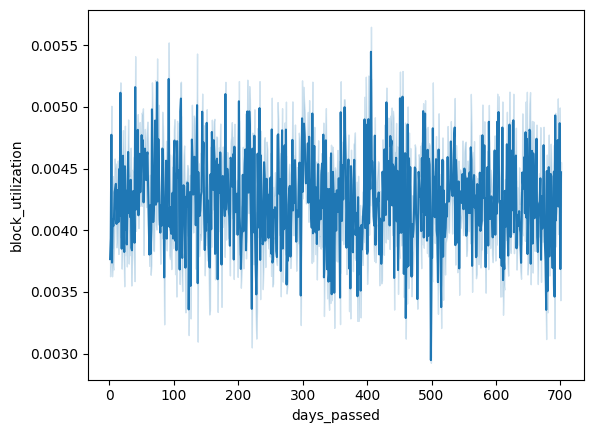

In [44]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization')

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

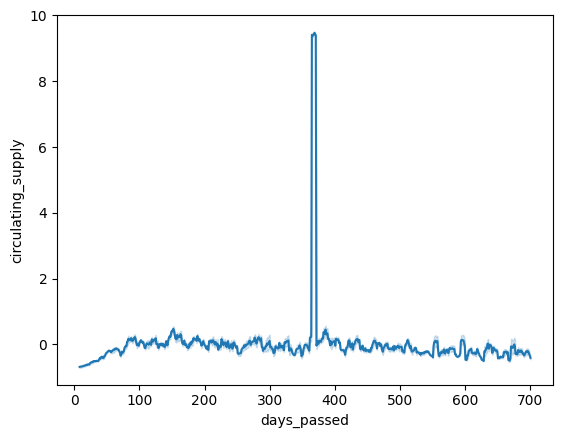

In [52]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply')